In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

idx = pd.IndexSlice

In [3]:
skins = pd.read_excel("datasets/all_skins.xlsx", header = [0,1], index_col = 0)

In [4]:
skins = skins.drop(labels = "2020-09-14", axis = 1) # 9/14/2020 data was not complete so dropped to preserve accuracy

C:\Users\William Huang\miniconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:3878: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
# created a copy of skins as loading the file can take too long
# accidental changes to the dataframe can be reverted through this clean copy

skins_copy = skins.copy()

In [5]:
skins

Weapon              Collection            Quality  \
      Unnamed: 1_level_1      Unnamed: 2_level_1 Unnamed: 3_level_1   
0              CZ75-Auto  The Baggage Collection     Consumer Grade   
1              CZ75-Auto  The Baggage Collection     Consumer Grade   
2              CZ75-Auto  The Baggage Collection     Consumer Grade   
3              CZ75-Auto  The Baggage Collection     Consumer Grade   
4              CZ75-Auto  The Baggage Collection     Consumer Grade   
...                  ...                     ...                ...   
10276       Hydra Gloves             Clutch Case      Extraordinary   
10277       Hydra Gloves             Clutch Case      Extraordinary   
10278       Hydra Gloves             Clutch Case      Extraordinary   
10279       Hydra Gloves             Clutch Case      Extraordinary   
10280       Hydra Gloves             Clutch Case      Extraordinary   

                    Skin          Condition           StatTrak  \
      Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1   
0            Green Plaid     Battle-Scarred              False   
1            Green Plaid          Well-Worn              False   
2            Green Plaid       Field-Tested              False   
3            Green Plaid       Minimal Wear              False   
4            Green Plaid        Factory New              False   
...                  ...                ...                ...   
10276           Mangrove     Battle-Scarred              False   
10277           Mangrove          Well-Worn              False   
10278           Mangrove       Field-Tested              False   
10279           Mangrove       Minimal Wear              False   
10280           Mangrove        Factory New              False   

                Souvenir 2013-08-01        2013-08-02  ...  2020-09-09         \
      Unnamed: 7_level_1      Price Volume      Price  ...       Price Volume   
0                    0.0        NaN    NaN        NaN  ...    0.627000    2.0   
1                    0.0        NaN    NaN        NaN  ...         NaN    NaN   
2                    0.0        NaN    NaN        NaN  ...    0.478187    6.0   
3                    0.0        NaN    NaN        NaN  ...    0.780000    2.0   
4                    0.0        NaN    NaN        NaN  ...         NaN    NaN   
...                  ...        ...    ...        ...  ...         ...    ...   
10276                0.0        NaN    NaN        NaN  ...  103.652375    4.0   
10277                0.0        NaN    NaN        NaN  ...   95.089250    3.0   
10278                0.0        NaN    NaN        NaN  ...  103.107250    6.0   
10279                0.0        NaN    NaN        NaN  ...  134.215875    4.0   
10280                0.0        NaN    NaN        NaN  ...         NaN    NaN   

       2020-09-10         2020-09-11         2020-09-12         2020-09-13  \
            Price Volume       Price Volume       Price Volume       Price   
0             NaN    NaN    0.855000    4.0    1.089000    1.0    1.012000   
1        0.555000    2.0         NaN    NaN    0.490000    1.0         NaN   
2        0.456000    1.0    0.628047   10.0    0.400000    1.0    0.522000   
3        0.821000    1.0    0.777000    2.0    0.812625    5.0    0.745000   
4        1.080000    3.0    1.102500    2.0    1.147750    3.0    1.092000   
...           ...    ...         ...    ...         ...    ...         ...   
10276   96.189000    3.0  103.997000    2.0   95.311000    3.0  101.277000   
10277  105.708000    1.0  106.870000    1.0         NaN    NaN  104.022250   
10278  100.482938    5.0   99.109773    9.0  104.087446   16.0  100.290398   
10279  124.767000    3.0  131.277000    1.0  141.769000    3.0  120.625000   
10280         NaN    NaN         NaN    NaN         NaN    NaN         NaN   

              
      Volume  
0        2.0  
1        NaN  
2        5.0  
3        2.0  
4        2.0  
...      ...  
10276    3.0  
10277    3.0  
10278   11.0  
1

In [3]:
stickers = pd.read_excel("datasets/all_stickers.xlsx", header = [0,1], index_col = 0)

In [691]:
stickers

NameError: name 'stickers' is not defined

In [4]:
others = pd.read_excel("datasets/all_others.xlsx", header = [0,1], index_col = 0)

In [ ]:
others

In [80]:
# generating a basic dataframe to store calculated values
skins_data = skins.loc[:,["Weapon", "Collection", "Quality", "Skin", "Condition", "StatTrak", "Souvenir"]]

skins_data.columns = skins_data.columns.droplevel(1) #dropping the second level created for the multiindex

In [5]:
# dataframe of just skins and knives for easier data analysis
skins_price = skins.loc[:, idx[:, "Price"]]
skins_price.columns = skins_price.columns.droplevel(1)
skins_price.columns = pd.to_datetime(skins_price.columns)
skins_price

,2013-08-01,2013-08-02,2013-08-03,2013-08-04,2013-08-05,2013-08-06,2013-08-07,2013-08-08,2013-08-09,2013-08-10,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.627000,NaN,0.855000,1.089000,1.012000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.555000,NaN,0.490000,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.327625,0.453875,0.523000,0.497563,0.460000,0.478187,0.456000,0.628047,0.400000,0.522000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.734000,0.827000,0.834000,0.807000,0.874000,0.780000,0.821000,0.777000,0.812625,0.745000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.115750,1.315000,1.156750,1.167000,NaN,NaN,1.080000,1.102500,1.147750,1.092000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.035250,94.789750,104.314000,103.724000,98.191500,103.652375,96.189000,103.997000,95.311000,101.277000
10277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.099500,93.859500,100.792000,97.992750,98.424500,95.089250,105.708000,106.870000,NaN,104.022250
10278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.864594,103.006438,96.488969,100.806250,101.696438,103.107250,100.482938,99.109773,104.087446,100.290398
10279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136.953500,139.497000,119.080000,139.493500,133.385500,134.215875,124.767000,131.277000,141.769000,120.625000


In [7]:
# dataframe of skin prices with no knives included
skins_price_g = skins.loc[:, idx[:, "Price"]]
skins_price_g.insert(loc = 0, value = skins["Quality"], column = "Quality")
skins_price_g = skins_price_g[(skins_price_g["Quality"] != "Extraordinary") & (skins_price_g["Quality"] != "Covert")]
skins_price_g = skins_price_g.drop(columns = ["Quality"], axis = 1)
skins_price_g.columns = skins_price_g.columns.droplevel(1)
skins_price_g.columns = pd.to_datetime(skins_price_g.columns)
skins_price_g

C:\Users\William Huang\miniconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:3878: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,2013-08-01,2013-08-02,2013-08-03,2013-08-04,2013-08-05,2013-08-06,2013-08-07,2013-08-08,2013-08-09,2013-08-10,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.627000,NaN,0.855000,1.089000,1.012
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.555,NaN,0.490000,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.327625,0.453875,0.52300,0.497563,0.460,0.478187,0.456,0.628047,0.400000,0.522
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.734000,0.827000,0.83400,0.807000,0.874,0.780000,0.821,0.777000,0.812625,0.745
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.115750,1.315000,1.15675,1.167000,NaN,NaN,1.080,1.102500,1.147750,1.092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,409.030000,434.467,NaN,NaN,NaN
7271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,511.720000,NaN,488.08000,451.680000,NaN,NaN,NaN,NaN,NaN,NaN
7273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,613.505000,NaN,NaN,NaN,NaN,501.000000,NaN


In [8]:
# dataframe of skin prices with covert/gloves only included
skins_price_kg = skins.loc[:, idx[:, "Price"]]
skins_price_kg.insert(loc = 0, value = skins["Quality"], column = "Quality")
skins_price_kg = skins_price_kg[(skins_price_kg["Quality"] == "Extraordinary") | (skins_price_kg["Quality"] == "Covert")]
skins_price_kg = skins_price_kg.drop(columns = ["Quality"], axis = 1)
skins_price_kg.columns = skins_price_kg.columns.droplevel(1)
skins_price_kg.columns = pd.to_datetime(skins_price_kg.columns)
skins_price_kg

C:\Users\William Huang\miniconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:3878: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,2013-08-01,2013-08-02,2013-08-03,2013-08-04,2013-08-05,2013-08-06,2013-08-07,2013-08-08,2013-08-09,2013-08-10,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.484281,4.626250,4.416000,4.541000,4.682203,NaN,4.632750,4.495687,4.699750,4.780000
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.440000,7.257500,NaN,NaN,6.981000,NaN,NaN,6.810000,NaN,6.747500
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.339823,4.361812,4.626961,4.651113,4.359448,4.743819,4.399578,4.415102,4.514632,4.587083
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.869125,6.102344,6.215523,5.632000,5.680063,5.439479,5.614883,5.631332,5.508922,5.636793
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.582750,9.131812,9.016078,9.268500,9.514375,9.394250,9.380500,9.569000,9.057688,8.117500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.035250,94.789750,104.314000,103.724000,98.191500,103.652375,96.189000,103.997000,95.311000,101.277000
10277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.099500,93.859500,100.792000,97.992750,98.424500,95.089250,105.708000,106.870000,NaN,104.022250
10278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.864594,103.006438,96.488969,100.806250,101.696438,103.107250,100.482938,99.109773,104.087446,100.290398
10279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136.953500,139.497000,119.080000,139.493500,133.385500,134.215875,124.767000,131.277000,141.769000,120.625000


In [86]:
# dataframe of just volumes for easier data analysis
skins_vol = skins.loc[:, idx[:, "Volume"]]
skins_vol.columns = skins_vol.columns.droplevel(1)
skins_vol.columns = pd.to_datetime(skins_vol.columns)
skins_vol

,2013-08-01,2013-08-02,2013-08-03,2013-08-04,2013-08-05,2013-08-06,2013-08-07,2013-08-08,2013-08-09,2013-08-10,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,1.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,2.0,7.0,1.0,6.0,1.0,10.0,1.0,5.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,5.0,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,3.0,2.0,NaN,NaN,3.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,5.0,2.0,1.0,2.0,4.0,3.0,2.0,3.0,3.0
10277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,4.0,2.0,3.0,1.0,1.0,NaN,3.0
10278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,8.0,7.0,3.0,10.0,6.0,5.0,9.0,16.0,11.0
10279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,1.0,2.0,2.0,4.0,3.0,1.0,3.0,1.0


# Basic Calculations

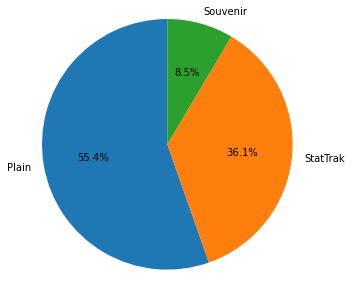

In [767]:
# getting count of stattrak, souvenir, and plain skins
st = len(skins[skins["StatTrak", "Unnamed: 6_level_1"] == True])
sv = len(skins[skins["Souvenir", "Unnamed: 7_level_1"] == True])
plain = len(skins) - st - sv

fig1, ax1 = plt.subplots()
fig1.set_size_inches(5,5)
ax1.pie([plain, st, sv], labels = ["Plain", "StatTrak", "Souvenir"], autopct = "%1.1F%%", startangle = 90)
ax1.axis("equal")
# plt.savefig("graphs/stsvpl.png", bbox_inches = "tight")

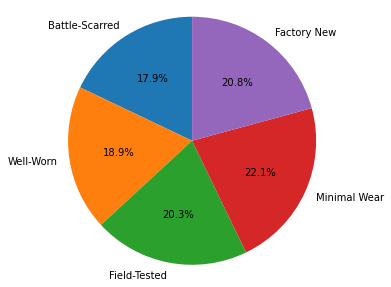

In [768]:
# count of different conditions
conditions = skins["Condition", "Unnamed: 5_level_1"].value_counts()
conditions = conditions.reindex(index = ["Battle-Scarred", "Well-Worn", "Field-Tested", "Minimal Wear", "Factory New"])
fig1, ax1 = plt.subplots()
fig1.set_size_inches(5,5)
ax1.pie(conditions, labels = conditions.index, autopct = "%1.1F%%", startangle = 90)
ax1.axis("equal")
# plt.savefig("graphs/conditions.png", bbox_inches = "tight")

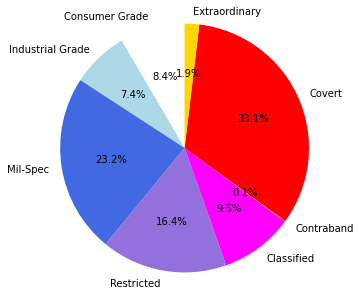

In [6]:
# count of the qualities
qualities = skins["Quality", "Unnamed: 3_level_1"].value_counts()
qualities = qualities.reindex(index = ["Consumer Grade", "Industrial Grade", "Mil-Spec", "Restricted", "Classified", "Contraband", "Covert", "Extraordinary"])
colors = ["white","lightblue", "royalblue", "mediumpurple", "magenta","darkgoldenrod", "red", "gold"]
fig1, ax1 = plt.subplots()
fig1.set_size_inches(5,5)
ax1.pie(qualities, labels = qualities.index, autopct = "%1.1F%%", colors = colors, startangle = 90)
ax1.axis("equal")
# plt.savefig("graphs/qualities.png", bbox_inches = "tight")

In [90]:
skins_data["AVG Price"] = skins_price.mean(axis = 1)

In [701]:
skins_data["AVG Price"].mean()

80.5092499331008

In [702]:
skins_data["AVG Price"].std()

169.59245732642603

In [87]:
skins_data["AVG Daily Volume"] = skins_vol.mean(axis = 1)

In [704]:
skins_data["AVG Daily Volume"].mean()

81.60888995071481

In [705]:
skins_data["AVG Daily Volume"].std()

197.94414434867207

In [710]:
# volume weighted average price
np.nansum((skins_price.mul(skins_vol)).values)/ np.nansum(skins_vol.values)

2.026007909316107

In [212]:
skins_data["Total Vol"] = skins_vol.apply(lambda row: np.nansum(row), axis = 1)

In [263]:
skins_data["First Date Sold"] = skins_price.apply(lambda row: pd.Series.first_valid_index(row), axis = 1)

In [233]:
vol_daily = skins_vol.apply(lambda column: np.nansum(column))
vol_daily.index = vol_daily.index.droplevel(1)
vol_daily = vol_daily.reset_index()
vol_daily["index"] = pd.to_datetime(vol_daily["index"])
vol_daily.columns = ["Date", "Vol"]

vol_daily = vol_daily[(vol_daily["Vol"] != 0)] # removing empty days at the start

vol_daily

,Date,Vol
12,2013-08-13,4.0
13,2013-08-14,87.0
14,2013-08-15,6998.0
15,2013-08-16,17072.0
16,2013-08-17,21164.0
...,...,...
2596,2020-09-09,584624.0
2597,2020-09-10,576704.0
2598,2020-09-11,619819.0
2599,2020-09-12,678882.0


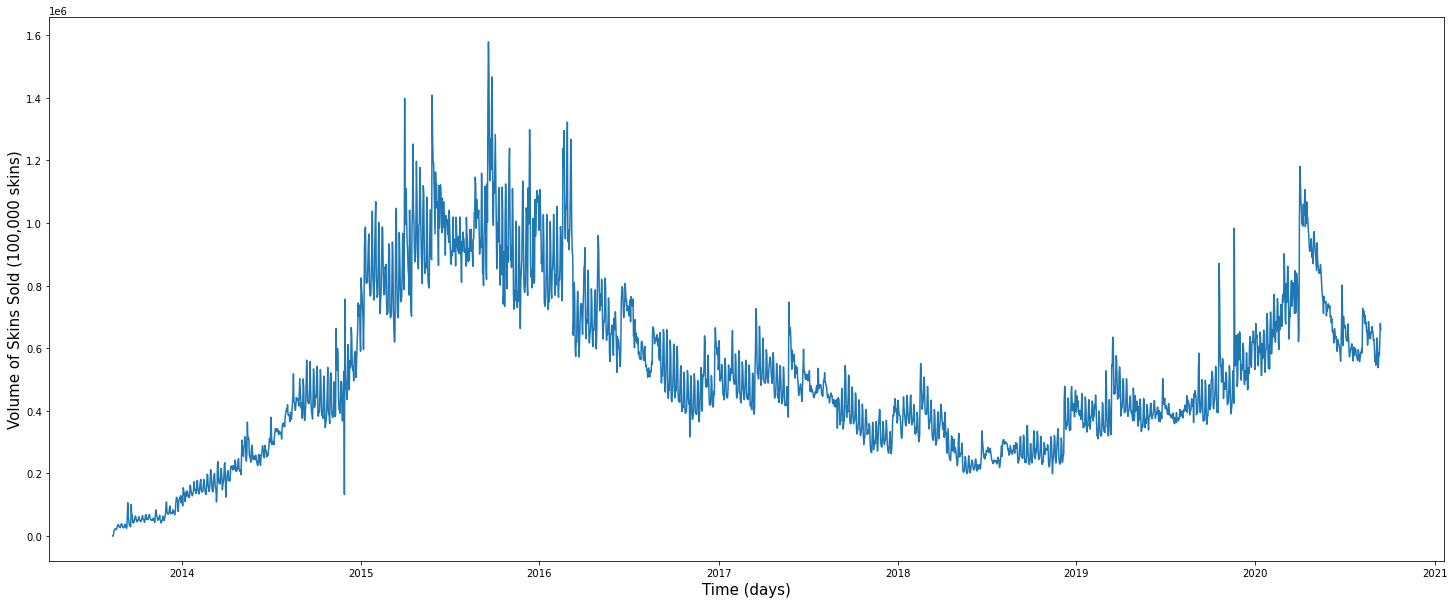

In [235]:
plt.figure(figsize = (25,10))
plt.plot(vol_daily["Date"], vol_daily["Vol"])
plt.xlabel("Time (days)", size = 15)
plt.ylabel("Volume of Skins Sold (100,000 skins)", size = 15)
plt.savefig("graphs/dailyvol_time.png")

# Appreciation Calculations

In [9]:
appreciation_dates = skins_price.apply(lambda x: pd.Series(x.loc[x.first_valid_index():].values), axis = 1)
appreciation_dates_g = skins_price_g.apply(lambda x: pd.Series(x.loc[x.first_valid_index():].values), axis = 1)
appreciation_dates_kg = skins_price_kg.apply(lambda x: pd.Series(x.loc[x.first_valid_index():].values), axis = 1)

In [10]:
last_dates = skins_price.fillna(method = "ffill", axis = 1)["2020-09-13"] # forward fill to take the last date sold's price
last_dates_g = skins_price_g.fillna(method = "ffill", axis = 1)["2020-09-13"]
last_dates_kg = skins_price_g.fillna(method = "ffill", axis = 1)["2020-09-13"]

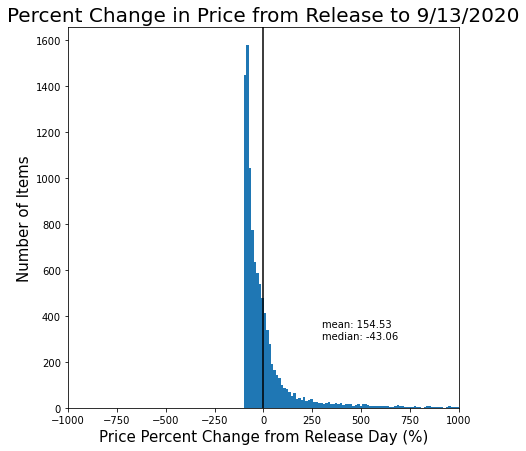

In [12]:
# average appreciation from day 1
app = ((last_dates.sub(appreciation_dates[0])).div(appreciation_dates[0], axis = 0) * 100)
plt.figure(figsize = (7, 7))
plt.xlim(-1000, 1000)
plt.xlabel("Price Percent Change from Release Day (%)", size = 15)
plt.ylabel("Number of Items", size =15)
plt.title("Percent Change in Price from Release to 9/13/2020", size = 20)
plt.hist(app, bins = 40000)
plt.annotate(text = "mean: {}\nmedian: {}".format(round(app.mean(), 2), round(app.median(), 2)) ,xy = (300, 300))
plt.axvline(0, color = "black")
plt.savefig("graphs/appreleasenow.png")

In [13]:
# percent change from day 1
decrease_1 = (((appreciation_dates.div(appreciation_dates[0], axis = 0)) * 100).mean()).rolling(20).mean()
decrease_2 = (((appreciation_dates_g.div(appreciation_dates_g[0], axis = 0)) * 100).mean()).rolling(20).mean()
decrease_3 = (((appreciation_dates_kg.div(appreciation_dates_kg[0], axis = 0)) * 100).mean()).rolling(20).mean()

[0.03973982] 41.16324299868559 0.42438989595533516


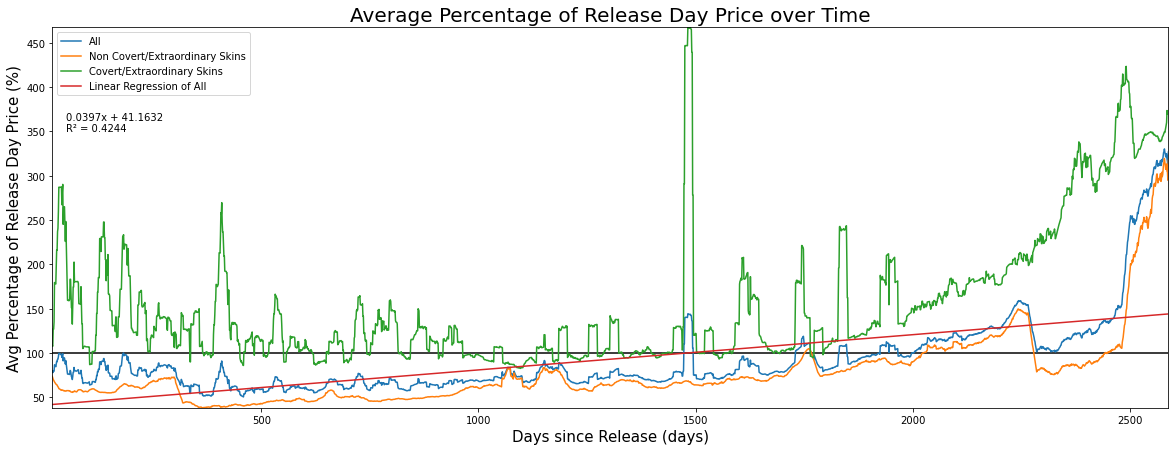

In [14]:
plt.figure(figsize = (20,7))
plt.margins(0)
plt.axhline(100, color = "black")
plt.xlabel("Days since Release (days)", size = 15)
plt.ylabel("Avg Percentage of Release Day Price (%)", size = 15)
plt.title("Average Percentage of Release Day Price over Time", size = 20)
#plt.xlim(left = 0, right = 100)
#plt.ylim(bottom = -50, top = 5)
plt.plot(decrease_1, label = "All")
plt.plot(decrease_2, label = "Non Covert/Extraordinary Skins")
plt.plot(decrease_3, label = "Covert/Extraordinary Skins")

#linear regression
y = np.array(decrease_1.dropna())
x = np.array(decrease_1.dropna().index).reshape((-1,1))

model = LinearRegression().fit(x,y)
print(model.coef_, model.intercept_, model.score(x,y))
x_coord = decrease_1.dropna().index
y_coord = model.coef_[0] * x + model.intercept_
plt.annotate(text = f"{round(model.coef_[0],4)}x + {round(model.intercept_, 4)}\nR² = {round(model.score(x,y), 4)}", xy = (50, 350))
plt.plot(x_coord, y_coord, label = "Linear Regression of All")

plt.legend()
# plt.savefig("graphs/percentchangeall3.png")

In [127]:
# mean value of non covert/extraordinary 1 year after release
decrease_2[:365].mean()

58.82707437482656

In [128]:
decrease_2[:365].std()

8.447672738013962

In [129]:
decrease_2.mean()

77.70230391511953

In [130]:
decrease_2.std()

42.21873841216789

In [133]:
decrease_2.median()

66.54848806564512

In [131]:
decrease_3.mean()

155.5217255495202

In [132]:
decrease_3.std()

75.2051474692818

In [134]:
decrease_3.median()

127.59896596103908

In [16]:
# getting the slope of the linear regression
def lin_reg(row):
    try:
        x = np.array(row.dropna().index).reshape((-1,1))
        y = np.array(row.dropna())

        model = LinearRegression().fit(x, y)

        return model.coef_[0]
    except:
        pass

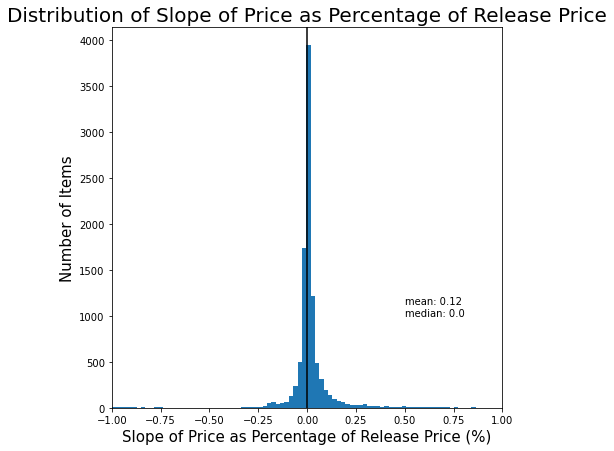

In [52]:
m = ((appreciation_dates.div(appreciation_dates[0], axis = 0))*100).apply(lambda row: lin_reg(row), axis = 1)
plt.figure(figsize = (7, 7))
plt.xlabel("Slope of Price as Percentage of Release Price (%)", size = 15)
plt.ylabel("Number of Items", size =15)
plt.title("Distribution of Slope of Price as Percentage of Release Price", size = 20)
plt.annotate(text = "mean: {}\nmedian: {}".format(round(m.mean(), 2), round(m.median(), 2)) ,xy = (.5, 1000))
plt.axvline(0, color = "black")
plt.hist(m, bins = 15000)
plt.xlim(-1, 1)

# plt.savefig("graphs/appslope.png")

In [20]:
m.mean()

0.12370253149920647

In [21]:
m.std()

3.448183412871692

In [53]:
m.median()

0.0032025509475685538

In [54]:
len(m.where(m>0).dropna())/len(m)

0.5752358719968874

# WHEN TO BUY IN

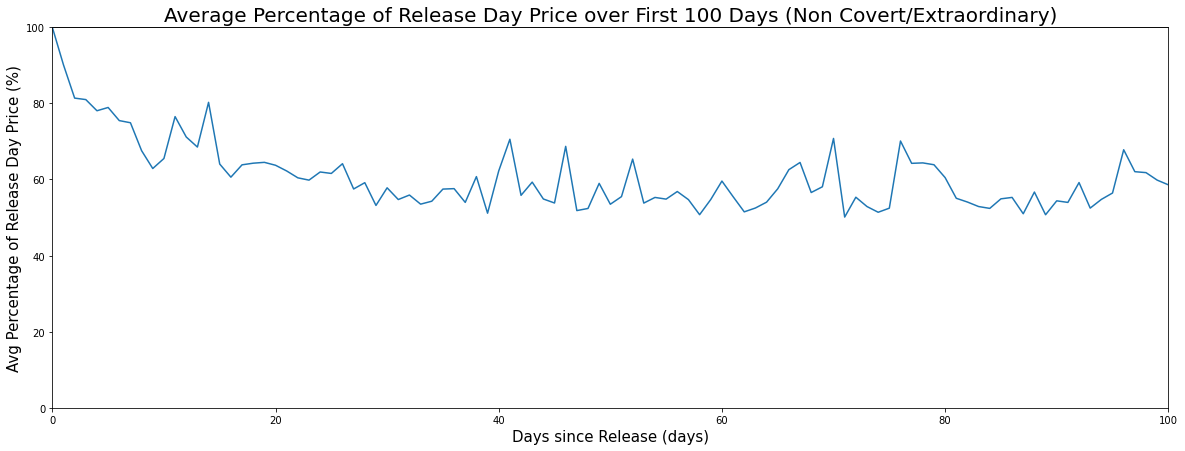

In [126]:
decrease = (((appreciation_dates_g.div(appreciation_dates_g[0], axis = 0)) * 100).mean())
plt.figure(figsize = (20,7))
plt.margins(0)
plt.axhline(100, color = "black")
plt.xlabel("Days since Release (days)", size = 15)
plt.ylabel("Avg Percentage of Release Day Price (%)", size = 15)
plt.title("Average Percentage of Release Day Price over First 100 Days (Non Covert/Extraordinary)", size = 20)
plt.xlim(left = 0, right = 100)
plt.ylim(bottom = 0, top = 100)
plt.plot(decrease)

plt.savefig("graphs/percentchangeskins100days.png")

[-0.10658279] 256.1949297298719 0.7580319790507419


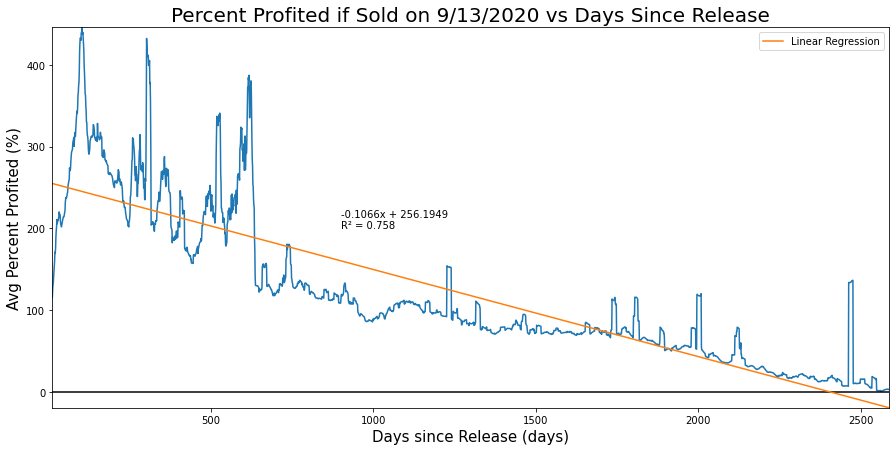

In [254]:
# calculating potential profits if bought and held to this day
# defunct and removed
profits = (-appreciation_dates.sub(last_dates, axis = 0).div(appreciation_dates) * 100).mean().rolling(14).mean()

y = np.array(profits.dropna())
x = np.array(profits.dropna().index).reshape((-1,1))

# linear regression
model = LinearRegression().fit(x,y)
print(model.coef_, model.intercept_, model.score(x,y))
x_coord = profits.dropna().index
y_coord = model.coef_[0] * x + model.intercept_

plt.figure(figsize = (20,7))
plt.plot(profits)
plt.margins(0)
plt.axhline(0, color = "black")
plt.plot(x_coord, y_coord, label = "Linear Regression")
plt.xlabel("Days since Release (days)", size = 15)
plt.ylabel("Avg Percent Profited (%)", size = 15)
plt.title("Percent Profited if Sold on 9/13/2020 vs Days Since Release", size = 20)
plt.annotate(text = f"{round(model.coef_[0],4)}x + {round(model.intercept_, 4)}\nR² = {round(model.score(x,y), 4)}", xy = (900, 200))
plt.legend()

# plt.savefig("graphs/percentgain.png")

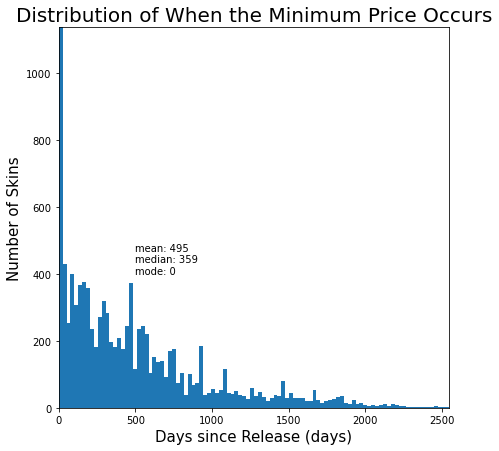

In [58]:
# calculating best possible day to buy in and hold
price_min = appreciation_dates.idxmin(axis = 1)
plt.figure(figsize = (7, 7))
plt.margins(0)
annotation = f"mean: {round(price_min.mean())}\nmedian: {round(price_min.median())} \nmode: {round(price_min.mode()[0])}"
plt.annotate(text = annotation, xy = (500, 400))
plt.xlabel("Days since Release (days)", size = 15)
plt.ylabel("Number of Skins", size = 15)
plt.title("Distribution of When the Minimum Price Occurs", size = 20)
plt.hist(price_min, bins = 100)

# plt.savefig("graphs/distributionofminimum.png")

In [184]:
len(price_min.where(price_min == ).dropna()) / len(price_min)

0.045909930940569985

In [195]:
price_min.std()

479.5601155307209

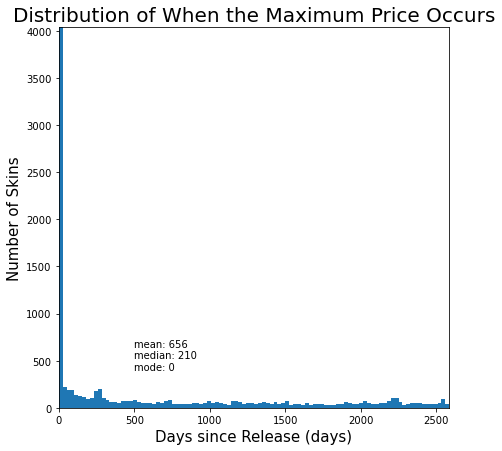

In [55]:
# calculating best possible day to sell
price_max = appreciation_dates.idxmax(axis = 1)
plt.figure(figsize = (7, 7))
plt.margins(0)
annotation = f"mean: {round(price_max.mean())}\nmedian: {round(price_max.median())} \nmode: {round(price_max.mode()[0])}"
plt.annotate(text = annotation, xy = (500, 400))
plt.xlabel("Days since Release (days)", size = 15)
plt.ylabel("Number of Skins", size = 15)
plt.title("Distribution of When the Maximum Price Occurs", size = 20)
plt.hist(price_max, bins = 100)

# plt.savefig("graphs/distributionofmaximum.png")

In [192]:
price_max.std()

820.4203931151801

In [205]:
price_max.where(price_max != 0).value_counts().std()

7.825208426166139

In [196]:
price_max.where(price_max != 0).mean()

907.268578352181

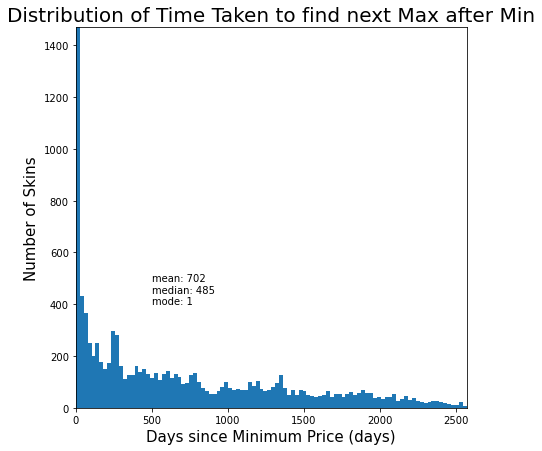

In [59]:
# calculating how much time to wait before selling
def when_to_sell(row):
    index_min = row.idxmin()
    try:
        return row.iloc[index_min:].idxmax()
    except:
        return
time_sell = appreciation_dates.apply(lambda row: when_to_sell(row), axis = 1) - price_min
time_sell

plt.figure(figsize = (7, 7))
plt.margins(0)
annotation = f"mean: {round(time_sell.mean())}\nmedian: {round(time_sell.median())} \nmode: {round(time_sell.mode()[0])}"
plt.annotate(text = annotation, xy = (500, 400))
plt.xlabel("Days since Minimum Price (days)", size = 15)
plt.ylabel("Number of Skins", size = 15)
plt.title("Distribution of Time Taken to find next Max after Min", size = 20)
plt.hist(time_sell, bins = 100)

# plt.savefig("graphs/timetaketofindmax.png")

In [241]:
time_sell.std()

676.6294559367823

In [250]:
len(time_sell.where(time_sell>365).dropna())/len(time_sell)

0.5644392568816263

In [228]:
price_min.dropna()

0         12.0
1         35.0
2          8.0
3         38.0
4         83.0
         ...  
10276    425.0
10277    858.0
10278     46.0
10279    776.0
10280    195.0
Length: 10280, dtype: float64

# VOLATILITY MEASUREMENTS

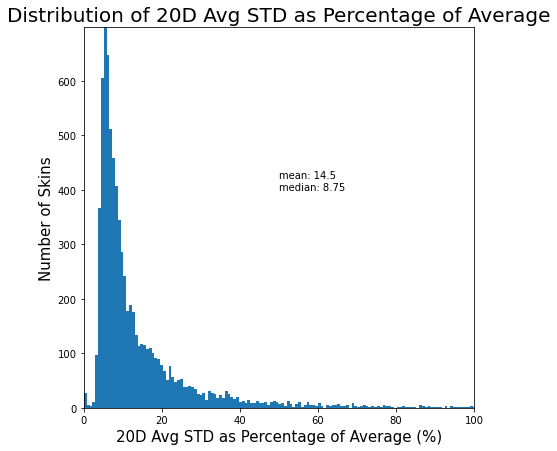

In [78]:
std_20d = skins_price.rolling(window = 20, axis = 1).std()
m_20d = skins_price.rolling(window = 20, axis =1).mean()

std = (std_20d.div(m_20d)*100).mean(axis = 1)

plt.figure(figsize = (7, 7))
plt.margins(0)
annotation = f"mean: {round(std.mean(), 2)}\nmedian: {round(std.median(), 2)}"
plt.annotate(text = annotation, xy = (50, 400))
plt.xlabel("20D Avg STD as Percentage of Average (%)", size = 15)
plt.ylabel("Number of Skins", size = 15)
plt.title("Distribution of 20D Avg STD as Percentage of Average", size = 20)
plt.xlim(0, 100)
plt.hist(std, bins = 500)
# plt.savefig("graphs/20dstd.png")

In [81]:
skins_data["20dSTD"] = std

In [79]:
std.std()

17.063195508206974

In [84]:
len(std.where(std > 8.105).dropna())/ len(std)

0.40881237233732126

In [107]:
skins_data[(skins_data["20dSTD"] > .8105) & (skins_data["AVG Daily Volume"] > 100) & (skins_data["AVG Price"] > .5)]

,Weapon,Collection,Quality,Skin,Condition,StatTrak,Souvenir,20dSTD,AVG Daily Volume,AVG Price
17,CZ75-Auto,The Bank Collection,Mil-Spec,Tuxedo,Factory New,False,0.0,8.609905,104.886549,0.635820
29,CZ75-Auto,The Chop Shop Collection,Mil-Spec,Emerald,Factory New,False,0.0,6.616608,129.560145,3.379023
38,CZ75-Auto,CS:GO Weapon Case 3,Mil-Spec,Crimson Web,Minimal Wear,False,0.0,11.753727,135.619127,1.048506
42,CZ75-Auto,CS:GO Weapon Case 3,Mil-Spec,Crimson Web,Field-Tested,True,0.0,14.242401,106.832848,1.170344
63,CZ75-Auto,Huntsman Weapon Case,Mil-Spec,Twist,Minimal Wear,True,0.0,10.830547,153.982502,0.707150
...,...,...,...,...,...,...,...,...,...,...
7236,Negev,Fracture Case,Mil-Spec,Ultralight,Factory New,False,0.0,20.904148,102.868421,0.918989
7239,Negev,Fracture Case,Mil-Spec,Ultralight,Field-Tested,True,0.0,25.392182,139.000000,0.602058
7262,Negev,Clutch Case,Restricted,Lionfish,Field-Tested,False,0.0,3.633681,260.670563,0.543004
7263,Negev,Clutch Case,Restricted,Lionfish,Minimal Wear,False,0.0,4.065078,184.918172,0.868940


In [104]:
skins_price

,2013-08-01,2013-08-02,2013-08-03,2013-08-04,2013-08-05,2013-08-06,2013-08-07,2013-08-08,2013-08-09,2013-08-10,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.627000,NaN,0.855000,1.089000,1.012000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.555000,NaN,0.490000,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.327625,0.453875,0.523000,0.497563,0.460000,0.478187,0.456000,0.628047,0.400000,0.522000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.734000,0.827000,0.834000,0.807000,0.874000,0.780000,0.821000,0.777000,0.812625,0.745000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.115750,1.315000,1.156750,1.167000,NaN,NaN,1.080000,1.102500,1.147750,1.092000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.035250,94.789750,104.314000,103.724000,98.191500,103.652375,96.189000,103.997000,95.311000,101.277000
10277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.099500,93.859500,100.792000,97.992750,98.424500,95.089250,105.708000,106.870000,NaN,104.022250
10278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.864594,103.006438,96.488969,100.806250,101.696438,103.107250,100.482938,99.109773,104.087446,100.290398
10279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136.953500,139.497000,119.080000,139.493500,133.385500,134.215875,124.767000,131.277000,141.769000,120.625000


## 20d STD AVG vs AVG Price
### UNUSED

<Figure size 1080x1080 with 0 Axes>

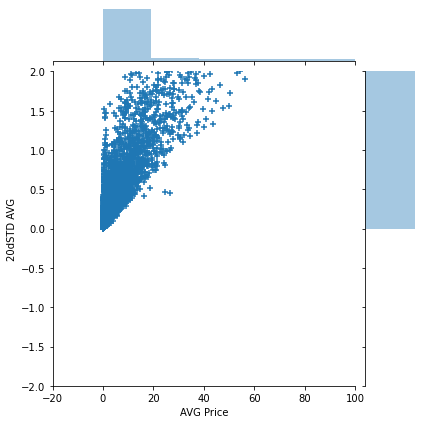

In [118]:
plt.figure(figsize = (15,15))
sns.jointplot(x = skins_data["AVG Price"], y = skins_data["20dSTD AVG"], dropna = True, xlim = (-20, 100), ylim = (-2, 2), marker = "+")

<Figure size 1080x1080 with 0 Axes>

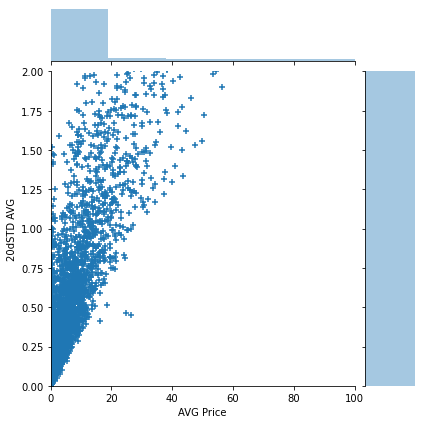

In [134]:
plt.figure(figsize = (15,15))
sns.jointplot(x = skins_data["AVG Price"], y = skins_data["20dSTD AVG"], dropna = True, xlim = (0, 100), ylim = (0, 2), marker = "+")

In [264]:
skins_data

,Weapon,Collection,Quality,Skin,Condition,StatTrak,Souvenir,20dSTD AVG,AVG Price,Total Vol,First Date Sold
0,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Battle-Scarred,False,0.0,0.457348,2.349978,26018.0,2014-07-02
1,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Well-Worn,False,0.0,0.679655,1.723136,16523.0,2014-07-02
2,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Field-Tested,False,0.0,0.059312,0.282976,174306.0,2014-07-02
3,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Minimal Wear,False,0.0,0.103822,0.343398,119617.0,2014-07-02
4,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Factory New,False,0.0,0.279495,0.710319,107018.0,2014-07-02
...,...,...,...,...,...,...,...,...,...,...,...
10276,Hydra Gloves,Clutch Case,Extraordinary,Mangrove,Battle-Scarred,False,0.0,5.974867,119.711260,1249.0,2018-02-18
10277,Hydra Gloves,Clutch Case,Extraordinary,Mangrove,Well-Worn,False,0.0,NaN,122.052609,756.0,2018-02-18
10278,Hydra Gloves,Clutch Case,Extraordinary,Mangrove,Field-Tested,False,0.0,5.890154,126.858526,4274.0,2018-02-17
10279,Hydra Gloves,Clutch Case,Extraordinary,Mangrove,Minimal Wear,False,0.0,7.645027,165.185686,961.0,2018-02-17
